# 1. Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products. Same is the case with each store.

The aim is to build a predictive model to find out the sales of each product at a particular store so that it would help the decision makers at BigMart to find out the properties of any product or store, which play a key role in increasing the overall sales.

# 2. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
train=pd.read_csv("Train.csv")
test =pd.read_csv("Test.csv")
train_original=train.copy()
test_original=test.copy()


# 3. Understanding the data

In [3]:
train.shape , test.shape

((8523, 12), (5681, 11))

train dataset has 8523 rows and 12 features and test has 5681 rows and 11 columns. train has 1 extra column which is the target variable. We will predict this target variable for the test dataset later in this project.

In [4]:
list(train.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [5]:
list(test.columns)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Item_Outlet_Sales is present in train but not in test dataset because this is the target variable that we have to predict

In [6]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

 As we can see, there are 4 numeric and 7 categorical variables
 
 Continuous variable : Item_Outlet_Sale
                       Item_weight
                       Item_Visibility 
                       Item_MRP
                       
 
 Categorical Variables : Item_Fat_Content 
                         Item_Type
                         Outlet_Identifier
                         Outlet_Size
                         Outlet_Establishment_Year
                         Outlet_Type
                         Outlet_Location_Type
                         

In [7]:
# Combine train and test data.

test['Item_Outlet_Sales']=0
combined=train.append(pd.DataFrame(data=test),ignore_index=True)
combined.shape


(14204, 12)

In [8]:
null_columns=combined.columns[combined.isnull().any()]
combined[null_columns].isnull().sum()

#combined.isnull().sum()

Item_Weight    2439
Outlet_Size    4016
dtype: int64

In [9]:
combined[combined['Outlet_Size'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,0.0000
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000


# 4. Extrapolatory Data Analysis

# 4.1 Univariate Analysis : Continuous Variables


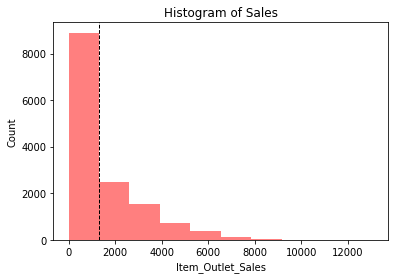

In [10]:
# Item_Outlet_Sales

combined['Item_Outlet_Sales'].plot.hist(color="r",alpha=0.5)
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales')
plt.axvline(combined['Item_Outlet_Sales'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()


As you can see, it is a right skewd variable and would need some data transformation to treat its skewness.

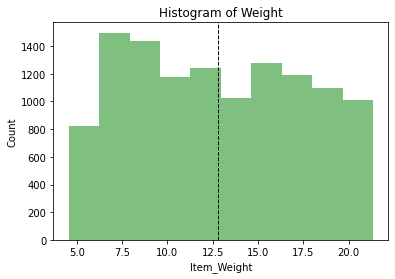

In [11]:
# Item_Weight

combined['Item_Weight'].plot.hist(color='g',alpha=0.5)
plt.xlabel('Item_Weight')
plt.ylabel('Count')
plt.title('Histogram of Weight')
plt.axvline(combined['Item_Weight'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.show()


There seems to be no clear-cut pattern in Item_Weight.

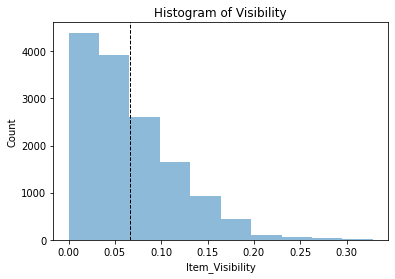

In [12]:
# Item_Visibility

combined['Item_Visibility'].plot.hist(alpha=0.5)
plt.xlabel('Item_Visibility')
plt.ylabel('Count')
plt.title('Histogram of Visibility')
plt.axvline(combined['Item_Visibility'].mean(),color='black',linestyle='dashed',linewidth=1)
plt.show()

Item_Visibility is right-skewed and should be transformed to curb its skewness

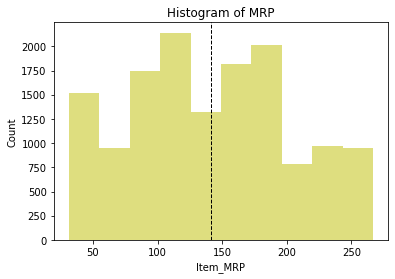

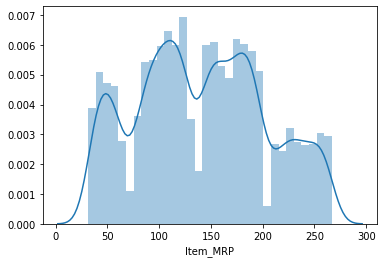

In [13]:
# Item_MRP

combined['Item_MRP'].plot.hist(color='y',alpha=0.5)
plt.xlabel('Item_MRP')
plt.ylabel('Count')
plt.title('Histogram of MRP')
plt.axvline(combined['Item_MRP'].mean(),color='k',linestyle='dashed',linewidth=1)
plt.show()
sns.distplot(combined['Item_MRP']) 
plt.show()

There seems to be no clear-cut pattern in Item_Weight

# 4.2 Univariate Analysis : Categorical Variables

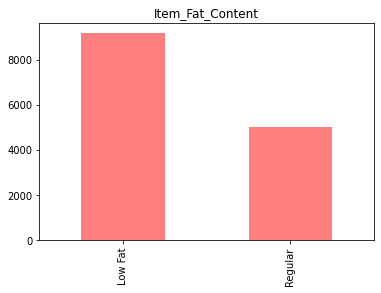

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [14]:
# Item_Fat_Content

combined['Item_Fat_Content'].replace(('LF','low fat'),'Low Fat',inplace=True)
combined['Item_Fat_Content'].replace('reg','Regular',inplace=True)
combined['Item_Fat_Content'].value_counts().plot.bar(title='Item_Fat_Content',color='r',alpha=0.5)
plt.show()
combined['Item_Fat_Content'].value_counts()


Sales of Low Fat products is higher than the products with Regular amount of Fat.

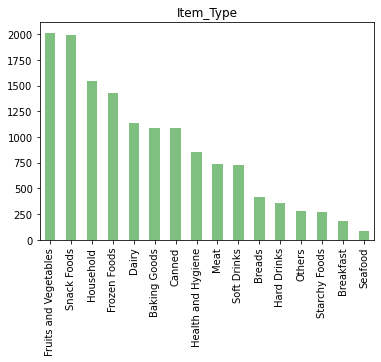

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [15]:
# Item_Type

combined['Item_Type'].value_counts().plot.bar(color='g',alpha=0.5)
plt.title('Item_Type')
plt.show()
combined['Item_Type'].value_counts()


"Fruits & Vegetables" and "Snack food" are the two most selling product category.

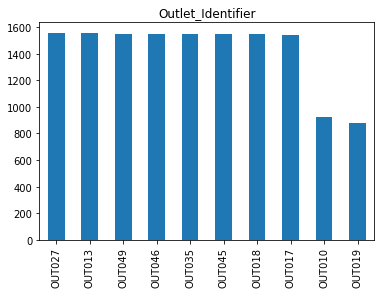

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [16]:
# Outlet_Identifier

combined['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Outlet_Identifier')
plt.show()
combined['Outlet_Identifier'].value_counts()

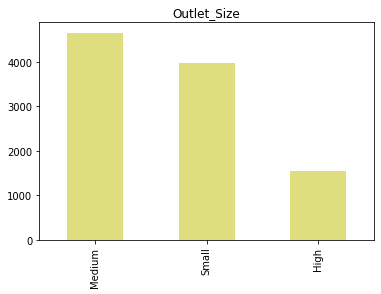

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
# Outlet_Size

combined['Outlet_Size'].value_counts().plot.bar(color='y',alpha=0.5)
plt.title('Outlet_Size')
plt.show()
combined['Outlet_Size'].value_counts()

In Outlet_Size’s plot, for 4016 observations, Outlet_Size is blank or missing.We will check for this in the bivariate analysis to substitute the missing values in the Outlet_Size.

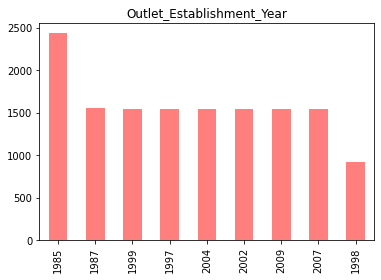

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
# Outlet_Establishment_Year

combined['Outlet_Establishment_Year'].value_counts().plot.bar(color='r',alpha=0.5)
plt.title('Outlet_Establishment_Year')
plt.show()
combined['Outlet_Establishment_Year'].value_counts()

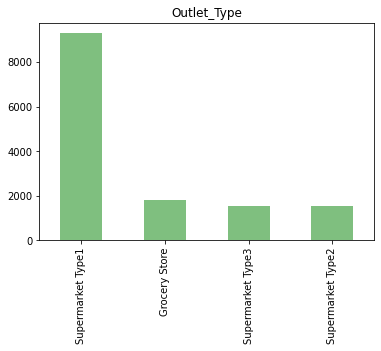

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [19]:
# Outlet_Type

combined['Outlet_Type'].value_counts().plot.bar(color='g',alpha=0.5)
plt.title('Outlet_Type')
plt.show()
combined['Outlet_Type'].value_counts()

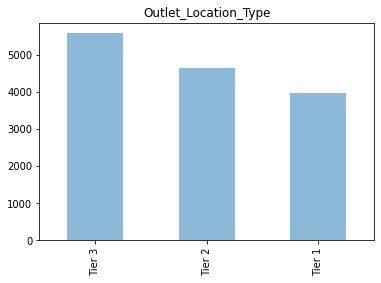

In [20]:
# Outlet_Location_Type

combined['Outlet_Location_Type'].value_counts().plot.bar(alpha=0.5)
plt.title('Outlet_Location_Type')
plt.show()

Maximum number of products are purchased in Tier 3 location type.

# 4.3 Bivariate Analysis : Target  vs Independent Continuous Variables

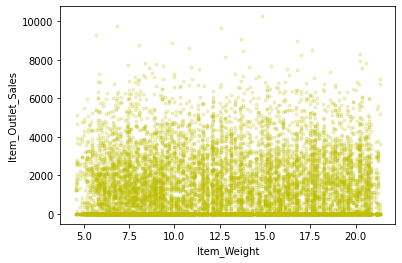

In [21]:
# Item_Weight vs Item_Outlet_Sales

plt.scatter(combined['Item_Weight'],combined['Item_Outlet_Sales'],marker ='.',alpha=0.2,color='y')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

Item_Outlet_Sales is spread well across the entire range of the Item_Weight without any obvious pattern.

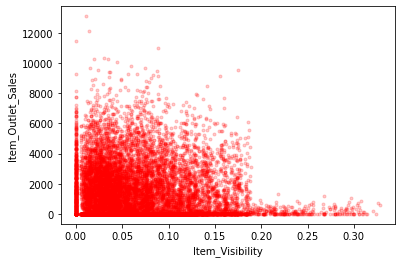

(879, 12)

In [22]:
# Item_Visibility vs Item_Outlet_Sales

plt.scatter(combined['Item_Visibility'],combined['Item_Outlet_Sales'],marker='.',color='r',alpha=0.2)
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()
combined[combined['Item_Visibility']==0].shape

There is a string of points at Item_Visibility = 0.0 which seems strange as item visibility cannot be completely zero. We will take note of this issue and deal with it in the later stages.

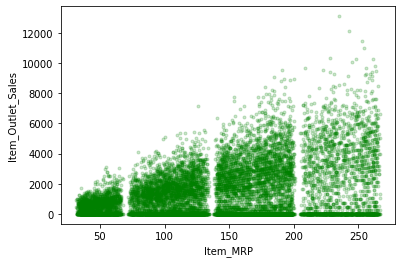

In [23]:
# Item_MRP vs Item_Outlet_Sales

plt.scatter(combined['Item_MRP'],combined['Item_Outlet_Sales'],marker='.',color='g',alpha=0.2)
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In the this plot of Item_MRP vs Item_Outlet_Sales, we can clearly see 4 segments of prices that can be used in feature engineering to create a new variable.

# 4.4 Bivariate Analysis : Target vs Independent Categorical Variables

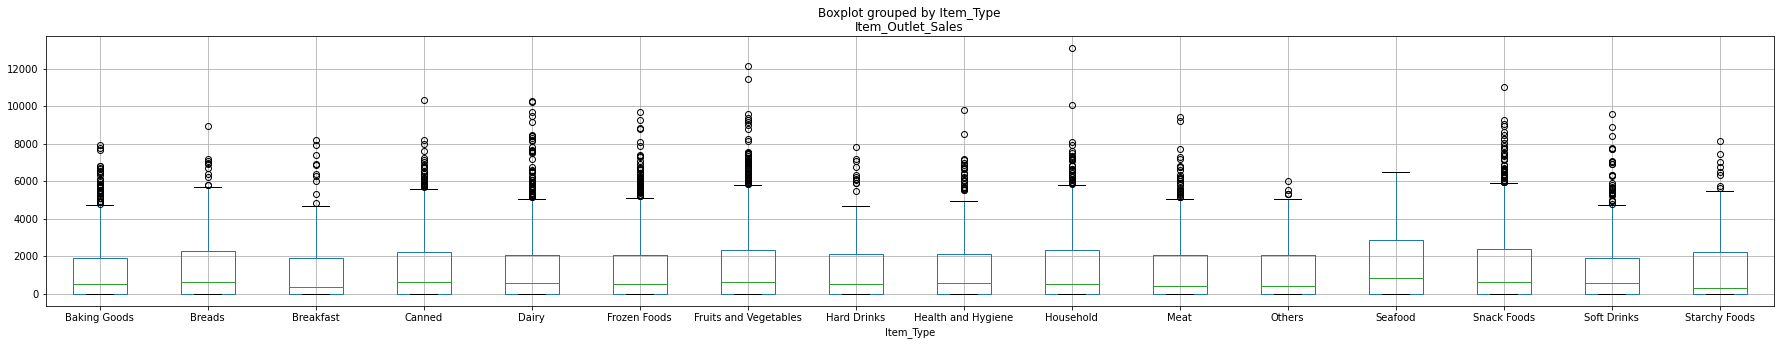

In [24]:
# Item_Outlet_Sales vs Item_Type

combined.boxplot(column='Item_Outlet_Sales',by='Item_Type',figsize=(30,5))
plt.show()

Distribution of Item_Outlet_Sales across the categories of Item_Type is not very distinct.

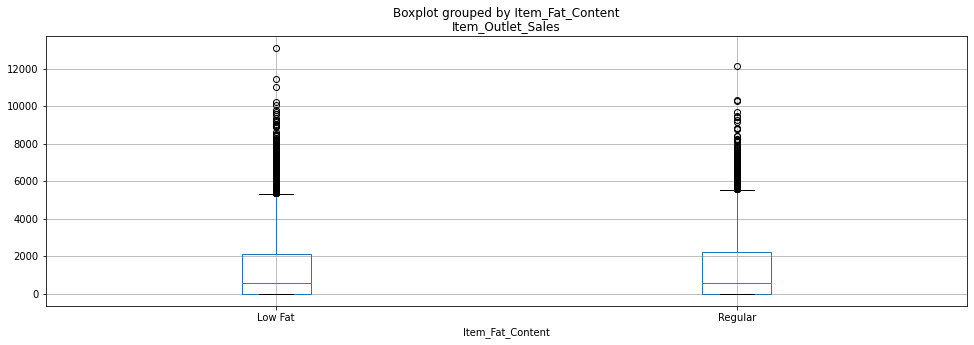

In [25]:
# Item_Outlet_Sales vs Item_Fat_Content

combined.boxplot(column="Item_Outlet_Sales",by='Item_Fat_Content',figsize=(16,5))
plt.show()

Distribution of Item_Outlet_Sales across the categories of Item_Fat_Content is also not very distinct.

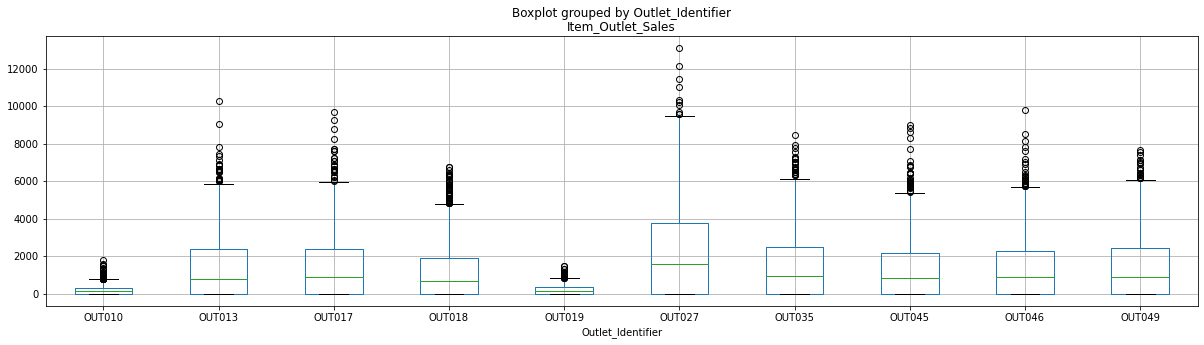

In [26]:
# Item_Outlet_Sales vs Outlet_Identifier

combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Identifier',figsize=(20,5))
plt.show()

The distribution for OUT010 and OUT019 categories of Outlet_Identifier are quite similar and very much different from the rest of the categories of Outlet_Identifier.

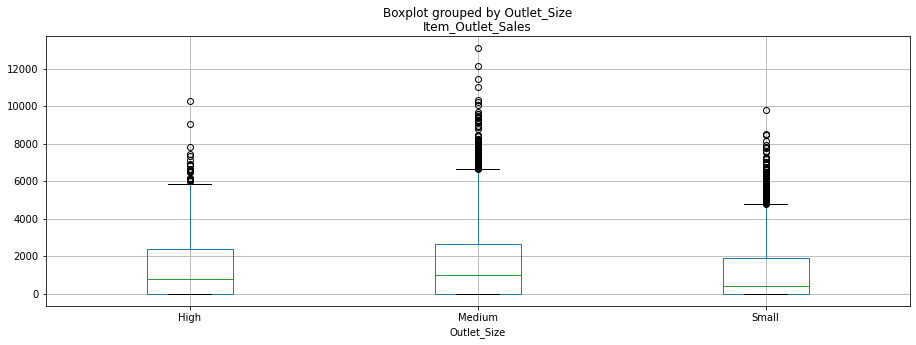

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [27]:
# Item_Outlet_Sales vs Outlet_Size

combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(15,5))
plt.show()
combined['Outlet_Size'].value_counts()

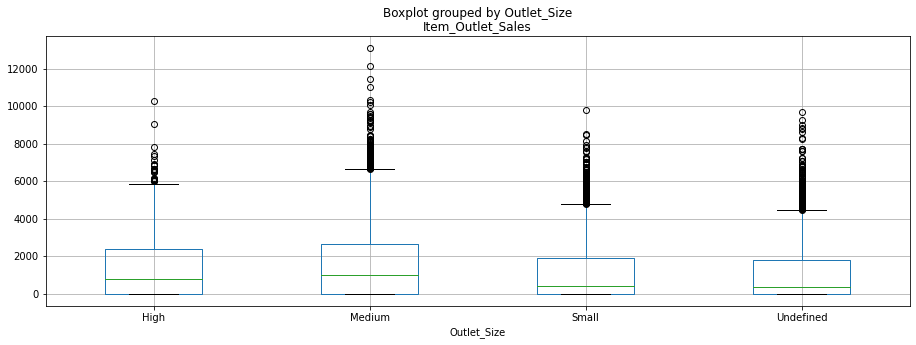

In [28]:
combined['Outlet_Size'].fillna('Undefined',inplace=True)
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(15,5))
plt.show()

The distribution of ‘Small’ Outlet_Size is almost identical to the distribution of the "undefined" category of Outlet_Size. So, we can substitute the undefined in Outlet_Size with ‘Small’.

In [29]:
combined['Outlet_Size'].replace('Undefined','Small',inplace=True)
combined['Outlet_Size'].value_counts()

Small     7996
Medium    4655
High      1553
Name: Outlet_Size, dtype: int64

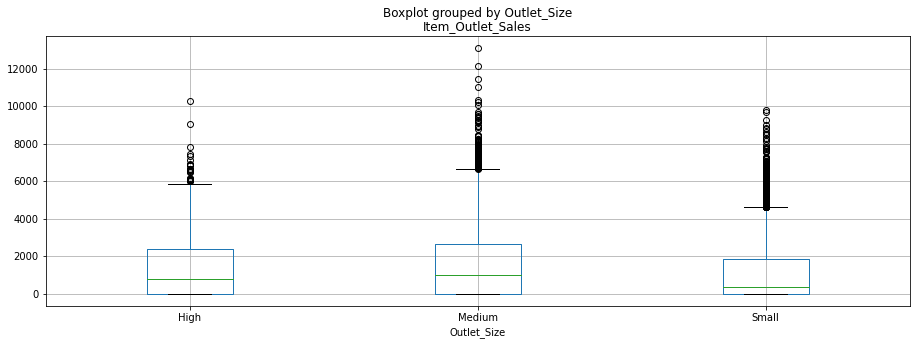

In [30]:
combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Size',figsize=(15,5))
plt.show()

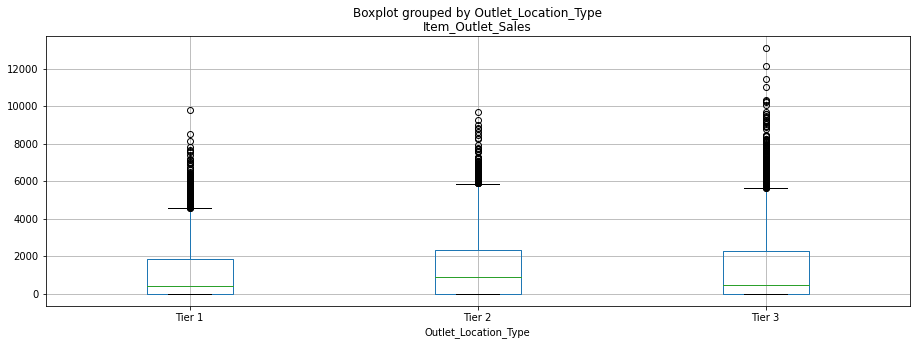

In [31]:
# Item_Outlet_Sales vs Outlet_Location_Type

combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Location_Type',figsize=(15,5))
plt.show()

Tier 1 and Tier 3 locations of Outlet_Location_Type look similar.


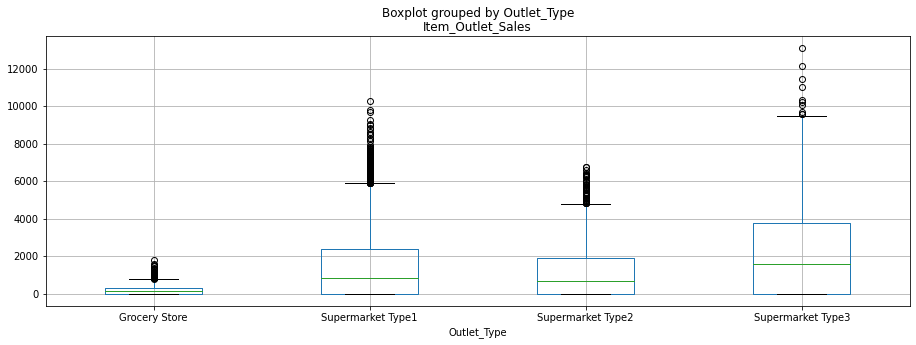

In [32]:
# Item_Outlet_Sales vs Outlet_Type

combined.boxplot(column='Item_Outlet_Sales',by='Outlet_Type',figsize=(15,5))
plt.show()

In the Outlet_Type plot, Grocery Store has most of its data points around the lower sales values as compared to the other categories.

# 5. Imputing Missing Values

**# Imputing Missing values of Item_Weight with avg_weight**

In [33]:
avg_weight=combined.pivot_table(values="Item_Weight",index="Item_Identifier")
avg_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [34]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return avg_weight['Item_Weight'][avg_weight.index == Identifier]
    else:
        return Weight
    
combined['Item_Weight'] = combined[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)

In [35]:
combined['Item_Weight'].isnull().sum()

0

**# Replacing 0’s in Item_Visibility variable**

In [36]:
combined[combined["Item_Visibility"]==0].shape

(879, 12)

In [37]:
avg_visibility=combined.pivot_table(values="Item_Visibility",index="Item_Identifier")
avg_visibility

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [38]:
def impute_visibility(cols):
    visibility=cols[0]
    identifier=cols[1]
    if visibility==0 :
        return avg_visibility["Item_Visibility"][avg_visibility.index ==identifier]
    else:
        return visibility
    
combined["Item_Visibility"]=combined[["Item_Visibility","Item_Identifier"]].apply(impute_visibility,axis=1).astype(float)

In [39]:
combined[combined["Item_Visibility"]==0].shape

(0, 12)

# 6. Feature Engineering

**# Creating new Variable Item_Type_New**

In [40]:
def func (x,list1, list2):
    if x in list1:
        return "Perishable"
    elif x in list2:
        return "Non Perishable"
    else:
        return "Not Sure"

Perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
Non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

combined["Item_Type_New"]= combined["Item_Type"].apply(lambda x : func(x,Perishable,Non_perishable))

In [41]:
combined["Item_Type_New"].value_counts()

Non Perishable    7090
Perishable        4576
Not Sure          2538
Name: Item_Type_New, dtype: int64

**# Create a broad category of Item_Identifier**

In [42]:
combined["Item_Identifier_New"]= combined["Item_Identifier"].apply(lambda x : x[0:2])
combined["Item_Identifier_New"]

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Identifier_New, Length: 14204, dtype: object

In [43]:
combined['Item_Identifier_New'] = combined['Item_Identifier_New'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
combined['Item_Identifier_New'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Identifier_New, dtype: int64

**# Removing Fat content from Non Consumable food**

In [44]:
pd.crosstab(combined["Item_Fat_Content"],combined["Item_Identifier_New"])

Item_Identifier_New,Drinks,Food,Non-Consumable
Item_Fat_Content,,,
Low Fat,1208,5291,2686
Regular,109,4910,0


In [45]:
combined.loc[combined['Item_Identifier_New']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
combined['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

**# years of operation for outlets** 

In [46]:
combined["Outlet_years"]=2020-combined["Outlet_Establishment_Year"]

**# Price per unit weight**

In [47]:
combined["PPUW"]=combined["Item_MRP"]/combined["Item_Weight"]

**# Creating clusters of Item_MRP**

In [48]:

def func_MRP(num):
    if num < 69:
        return "1st"
    elif num>=69 and num<136:
        return "2nd"
    elif num>=136 and num<203:
        return "3rd"
    else:
        return "4th"

In [49]:
combined["Item_MRP_cluster"] = combined["Item_MRP"].apply(func_MRP)

In [50]:
combined["Item_MRP_cluster"].value_counts()

3rd    4935
2nd    4661
4th    2400
1st    2208
Name: Item_MRP_cluster, dtype: int64

# 7. Encoding Categorical Variables



**# Label Encoding**

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(combined["Outlet_Size"])
label_encoder.classes_

array(['High', 'Medium', 'Small'], dtype=object)

In [52]:
label_encoder.transform(['High', 'Medium', 'Small'])

array([0, 1, 2], dtype=int64)

**Outlet_Size**

In [53]:
combined["Outlet_Size"] = label_encoder.transform(combined["Outlet_Size"])

In [54]:
combined["Outlet_Size"].value_counts()

2    7996
1    4655
0    1553
Name: Outlet_Size, dtype: int64

**Outlet_Location_Type**

In [55]:
label_encoder.fit(combined["Outlet_Location_Type"])
label_encoder.classes_

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [56]:
label_encoder.transform(['Tier 1', 'Tier 2', 'Tier 3'])

array([0, 1, 2], dtype=int64)

In [57]:
combined["Outlet_Location_Type"] = label_encoder.transform(combined["Outlet_Location_Type"])

In [58]:
combined["Outlet_Location_Type"].value_counts()

2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

**# One Hot Encoding**

In [59]:
combined=pd.get_dummies(combined,columns=["Item_Fat_Content","Outlet_Identifier","Outlet_Type","Item_Type_New","Item_Identifier_New","Item_MRP_cluster"])
combined

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_years,...,Item_Type_New_Non Perishable,Item_Type_New_Not Sure,Item_Type_New_Perishable,Item_Identifier_New_Drinks,Item_Identifier_New_Food,Item_Identifier_New_Non-Consumable,Item_MRP_cluster_1st,Item_MRP_cluster_2nd,Item_MRP_cluster_3rd,Item_MRP_cluster_4th
0,FDA15,9.30,0.016047,Dairy,249.8092,1999,1,0,3735.1380,21,...,0,0,1,0,1,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,2009,1,2,443.4228,11,...,1,0,0,1,0,0,1,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,1999,1,0,2097.2700,21,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.20,0.017834,Fruits and Vegetables,182.0950,1998,2,2,732.3800,22,...,0,0,1,0,1,0,0,0,1,0
4,NCD19,8.93,0.009780,Household,53.8614,1987,0,2,994.7052,33,...,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,Snack Foods,141.3154,1997,2,0,0.0000,23,...,0,1,0,0,1,0,0,0,1,0
14200,FDD47,7.60,0.142991,Starchy Foods,169.1448,2009,1,2,0.0000,11,...,0,1,0,0,1,0,0,0,1,0
14201,NCO17,10.00,0.073529,Health and Hygiene,118.7440,2002,2,1,0.0000,18,...,1,0,0,0,0,1,0,1,0,0
14202,FDJ26,15.30,0.088380,Canned,214.6218,2007,2,1,0.0000,13,...,1,0,0,0,1,0,0,0,0,1


In [60]:
combined.dtypes

Item_Identifier                        object
Item_Weight                           float64
Item_Visibility                       float64
Item_Type                              object
Item_MRP                              float64
Outlet_Establishment_Year               int64
Outlet_Size                             int32
Outlet_Location_Type                    int32
Item_Outlet_Sales                     float64
Outlet_years                            int64
PPUW                                  float64
Item_Fat_Content_Low Fat                uint8
Item_Fat_Content_Non-Edible             uint8
Item_Fat_Content_Regular                uint8
Outlet_Identifier_OUT010                uint8
Outlet_Identifier_OUT013                uint8
Outlet_Identifier_OUT017                uint8
Outlet_Identifier_OUT018                uint8
Outlet_Identifier_OUT019                uint8
Outlet_Identifier_OUT027                uint8
Outlet_Identifier_OUT035                uint8
Outlet_Identifier_OUT045          

In [61]:
combined[['Item_Fat_Content_Regular',"Item_Fat_Content_Low Fat","Item_Fat_Content_Non-Edible"]]

,Item_Fat_Content_Regular,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
14199,1,0,0
14200,1,0,0
14201,0,0,1
14202,1,0,0


# 8. Data Preprocessing

In [62]:
# Drop the unwanted columns
combined.drop(['Item_Type',"Outlet_Establishment_Year"],inplace=True,axis=1)

**# Remove skewness from item visibility variable**

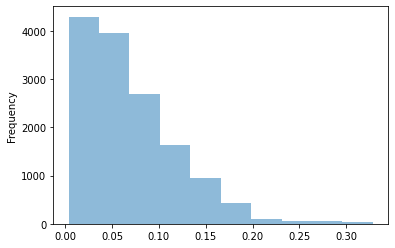

In [63]:
combined['Item_Visibility'].plot.hist(alpha=0.5)
plt.show()

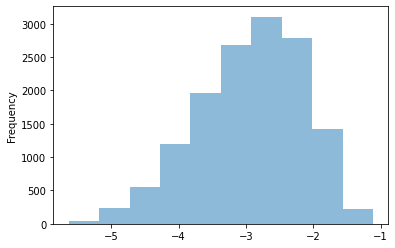

In [64]:
combined['Item_Visibility']= np.log(combined['Item_Visibility'])
combined['Item_Visibility'].plot.hist(alpha=0.5)
plt.show()

**# Remove skewness from Price Per Unit Weight**

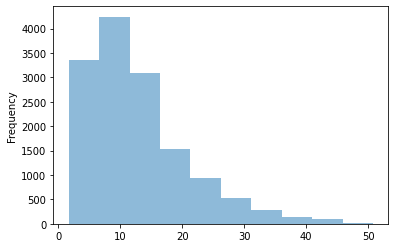

In [65]:
combined['PPUW'].plot.hist(alpha=0.5)
plt.show()

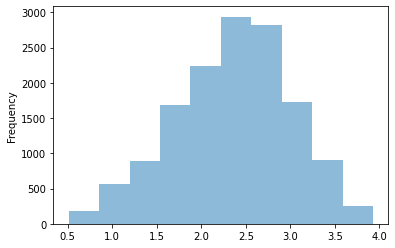

In [66]:
combined['PPUW']=np.log(combined['PPUW'])
combined['PPUW'].plot.hist(alpha=0.5)
plt.show()

**Splitting the modified data into train and test data**

In [67]:
new_train = combined[:8523]
new_test = combined[8523:]
new_test.drop("Item_Outlet_Sales", inplace=True, axis=1)
new_train.shape, new_test.shape

C:\Users\deepa\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((8523, 36), (5681, 35))

**# Correlation among variables**

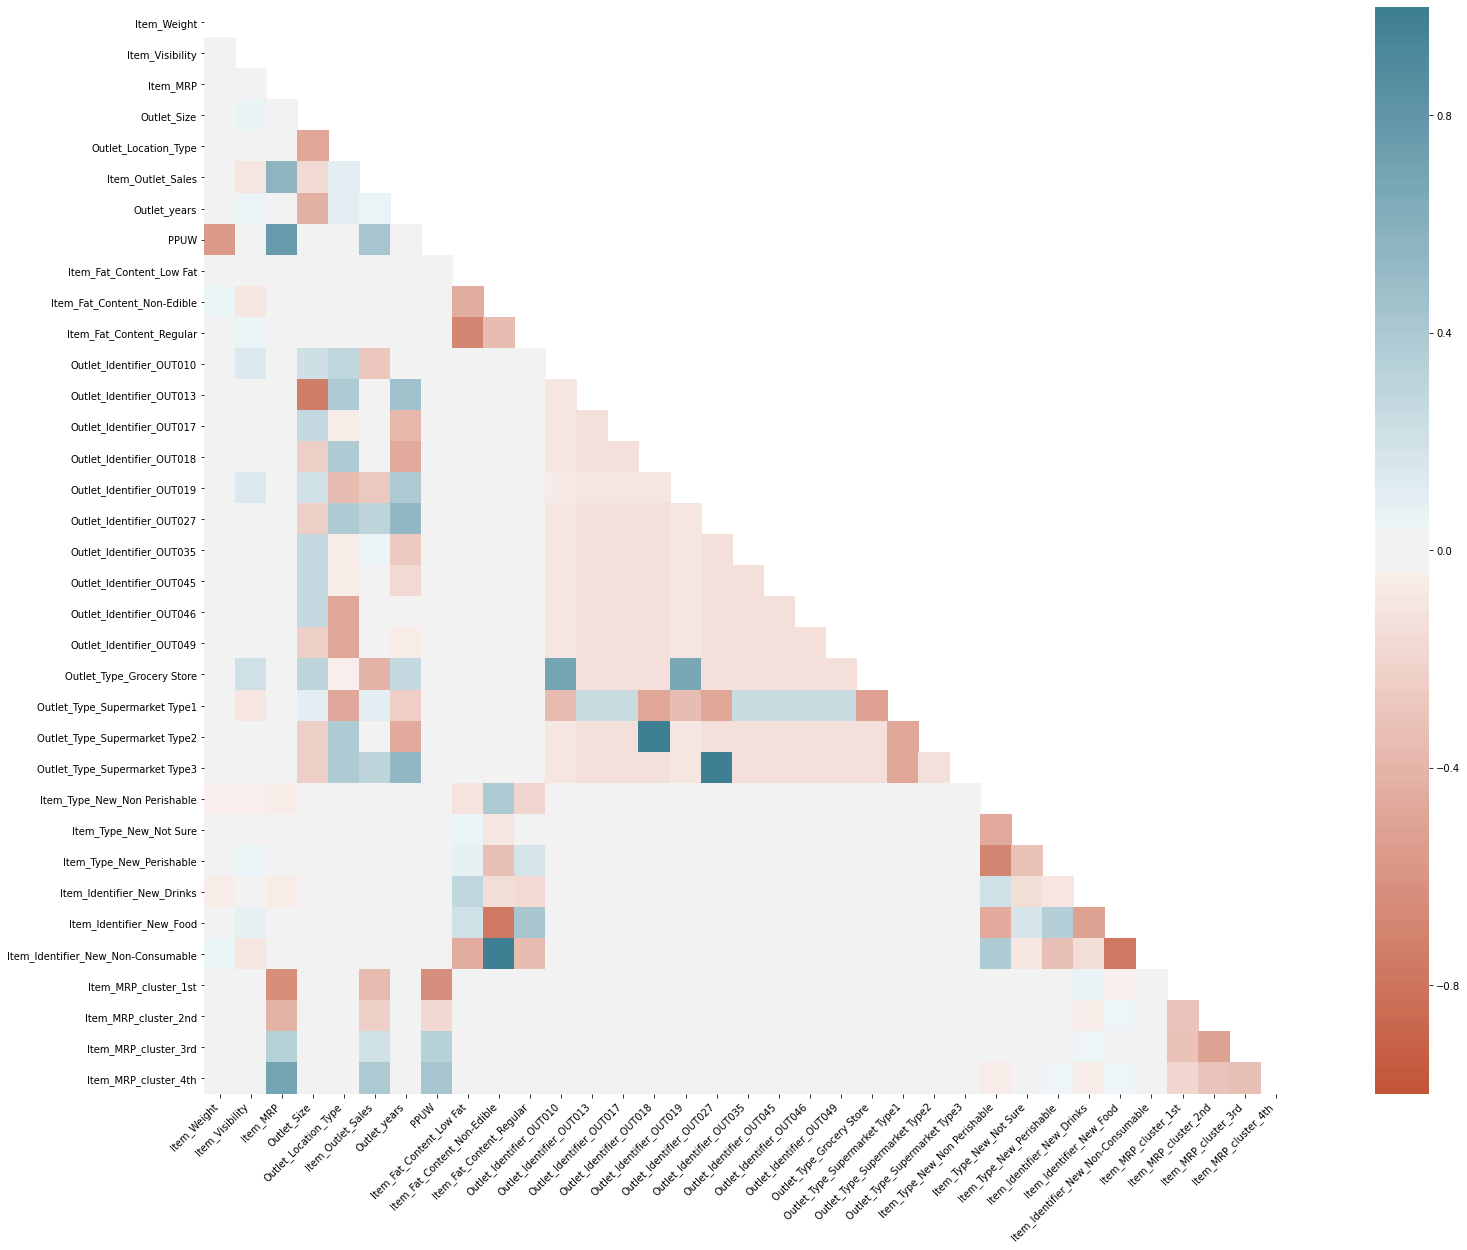

In [68]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(30,20))         
corr = new_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 9. Model Building :  Linear Regression

**# train_test split**

In [69]:
x=new_train.drop(["Item_Identifier", "Item_Outlet_Sales"],axis=1)
y=new_train["Item_Outlet_Sales"]
y=np.log(y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=101)

**# Training Model**

In [70]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
lm.coef_

array([ 3.38792697e-02,  1.07761460e-03,  4.14061537e-03, -2.34649253e-01,
       -3.38961471e-03, -1.63224745e-02,  4.08025697e-01, -9.60846339e-03,
        3.50965066e-03,  6.09881274e-03, -5.47418614e-01, -1.13763678e-01,
        8.48389187e-02, -2.34664737e-02, -3.12000216e-01,  5.23797426e-01,
        1.54908645e-01,  7.85655006e-02,  1.92692835e-01, -3.81543434e-02,
       -8.59418830e-01,  3.59087877e-01, -2.34664737e-02,  5.23797426e-01,
       -1.30489061e-02,  5.10236033e-03,  7.94654576e-03, -3.58114919e-03,
        7.14985369e-05,  3.50965066e-03, -1.69786981e-01,  5.95042139e-02,
        9.82216318e-02,  1.20611355e-02])

**# Model prediction and evaluation**

In [71]:
# Coefficients

print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
#coeff_df

5.792285718608385


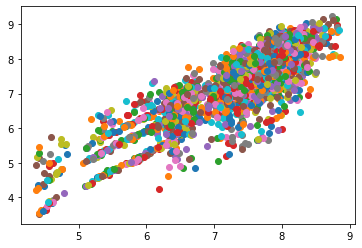

In [72]:
# Predcition

pred_lr = lm.predict(x_test)
for i,j in zip(pred_lr,y_test):
    plt.scatter(i,j, cmap='viridis')

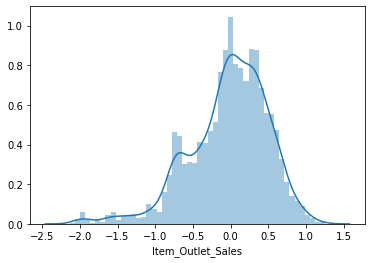

In [73]:
# Residual Distribution
sns.distplot((y_test-pred_lr),bins=50); 

#####  Calculation of RMSE and R-Squared

In [74]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, pred_lr))))
print("R-Square:",round(r2_score(y_test,pred_lr),2))

RMSE: 1.0
R-Square: 0.74


# 10. K-folds + Linear Regression

In [75]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
i=1 
RMSE = 0
sum = 0
kf = KFold(n_splits=10,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(x,y):   
    #print("train:",train_index, "\ntest:",test_index)
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = x.loc[train_index],x.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LinearRegression()     
    model.fit(xtr, ytr)     
    pred_kf = model.predict(xvl)
    score = r2_score(yvl,pred_kf) 
    rmse=np.sqrt(metrics.mean_squared_error(yvl, pred_kf))
    sum+=score
    RMSE+=rmse
    print('RMSE:',round(rmse)) 
    print('R-Square:',round(score,2))     
    i+=1 
    #pred_test = model.predict(x_test)
    #pred=model.predict_proba(xvl)[:,1]


1 of kfold 10
RMSE: 1.0
R-Square: 0.76

2 of kfold 10
RMSE: 1.0
R-Square: 0.73

3 of kfold 10
RMSE: 0.0
R-Square: 0.75

4 of kfold 10
RMSE: 1.0
R-Square: 0.71

5 of kfold 10
RMSE: 1.0
R-Square: 0.73

6 of kfold 10
RMSE: 0.0
R-Square: 0.75

7 of kfold 10
RMSE: 1.0
R-Square: 0.74

8 of kfold 10
RMSE: 0.0
R-Square: 0.75

9 of kfold 10
RMSE: 1.0
R-Square: 0.7

10 of kfold 10
RMSE: 1.0
R-Square: 0.74


In [76]:
print('Avg RMSE:',round(RMSE/10))
print("Avg R-Square:",round((sum/10),2))

Avg RMSE: 1.0
Avg R-Square: 0.74


# 11. Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
i=1
sum=0
RMSE=0
kf = KFold(n_splits=10,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of K fold {}'.format(i,kf.n_splits))
    xtr, xvl= x.loc[train_index],x.loc[test_index]
    ytr, yvl =y.loc[train_index], y.loc[test_index]
    model=RandomForestRegressor(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_rf=model.predict(xvl)
    score=r2_score(yvl,pred_rf)
    rmse=np.sqrt(metrics.mean_squared_error(yvl, pred_rf))
    sum+=score
    RMSE+=rmse
    print('RMSE:',round(rmse))
    print('R-Square:',round(score,2))
    i+=1
    #pred_test=model.predict(x_test)


1 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.74

2 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.71

3 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.74

4 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.71

5 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.73

6 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.73

7 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.72

8 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.73

9 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.69

10 of K fold 10


C:\Users\deepa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 1.0
R-Square: 0.73


In [78]:
print('Avg RMSE:',round(RMSE/10))
print("Avg R-Square:",round((sum/10),2))

Avg RMSE: 1.0
Avg R-Square: 0.72


# 12. XGBoost

In [79]:
from xgboost import XGBRegressor
i=1
sum=0
RMSE=0
kf= KFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(x,y):
    print('\n{} of k fold {}'.format(i,kf.n_splits))
    xtr,xvl=x.loc[train_index],x.loc[test_index]
    ytr,yvl=y.loc[train_index],y.loc[test_index]
    model=XGBRegressor(n_estimator=50,max_depth=7)
    model.fit(xtr,ytr)
    pred_xg=model.predict(xvl)
    score=r2_score(yvl,pred_xg)
    rmse=np.sqrt(metrics.mean_squared_error(yvl, pred_xg))
    sum+=score
    RMSE+=rmse
    print('RMSE:',round(rmse))
    print('R-Square:',round(score,2))
    i+=1
    #pred_test=model.predict(x_test)
    #pred=model.predict_proba(xvl)[:,1]


1 of k fold 10
RMSE: 1.0
R-Square: 0.72

2 of k fold 10
RMSE: 1.0
R-Square: 0.69

3 of k fold 10
RMSE: 1.0
R-Square: 0.72

4 of k fold 10
RMSE: 1.0
R-Square: 0.68

5 of k fold 10
RMSE: 1.0
R-Square: 0.71

6 of k fold 10
RMSE: 1.0
R-Square: 0.71

7 of k fold 10
RMSE: 1.0
R-Square: 0.69

8 of k fold 10
RMSE: 1.0
R-Square: 0.71

9 of k fold 10
RMSE: 1.0
R-Square: 0.67

10 of k fold 10
RMSE: 1.0
R-Square: 0.7


In [80]:
print('Avg RMSE:',round(RMSE/10))
print("Avg R-Square:",round((sum/10),2))

Avg RMSE: 1.0
Avg R-Square: 0.7


# Conclusion

* K-folds + Linear Regression:  
                             